In [1]:
import pickle
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np

benchmark = pickle.load(open('./data/full_stack_benchmark.p', 'rb' ))
# benchmark = pickle.load(open('./data/full_stack_benchmark_early_termination.p', 'rb' ))

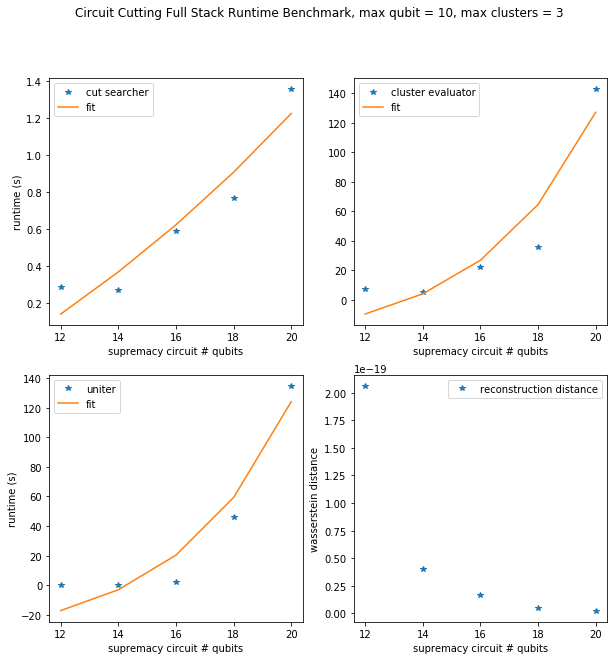

In [2]:
def func(x, a, b):
    return np.exp(a*x)+b
num_qubits,times,noiseless_reconstruction_distance,noisy_reconstruction_distance,full_circ_noisy_noisless_distance = benchmark

# plt.figure(figsize=(10,15))
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(num_qubits,times['searcher'],'*',label='cut searcher')
optimizedParameters, pcov = opt.curve_fit(func, np.array(num_qubits), np.array(times['searcher']))
plt.plot(num_qubits, func(np.array(num_qubits), *optimizedParameters), label="fit")
plt.xlabel('supremacy circuit # qubits')
plt.ylabel('runtime (s)')
plt.legend()
plt.subplot(222)
plt.plot(num_qubits,times['evaluator'],'*',label='cluster evaluator')
optimizedParameters, pcov = opt.curve_fit(func, np.array(num_qubits), np.array(times['evaluator']))
plt.plot(num_qubits, func(np.array(num_qubits), *optimizedParameters), label="fit")
plt.xlabel('supremacy circuit # qubits')
plt.legend()
plt.subplot(223)
plt.plot(num_qubits,times['uniter'],'*',label='uniter')
optimizedParameters, pcov = opt.curve_fit(func, np.array(num_qubits), np.array(times['uniter']))
plt.plot(num_qubits, func(np.array(num_qubits), *optimizedParameters), label="fit")
plt.xlabel('supremacy circuit # qubits')
plt.ylabel('runtime (s)')
plt.legend()
plt.subplot(224)
plt.plot(num_qubits,noiseless_reconstruction_distance,'*',label='reconstruction distance')
plt.xlabel('supremacy circuit # qubits')
plt.ylabel('wasserstein distance')
plt.legend()
plt.suptitle('Circuit Cutting Full Stack Runtime Benchmark, max qubit = 10, max clusters searched = 3')
# plt.savefig('./data/benchmark_early_termination.png')
plt.savefig('./data/benchmark.png')

Text(0.5, 0.98, 'Circuit Cutting Fidelity Benchmark, max qubit = 5, max clusters = 9')

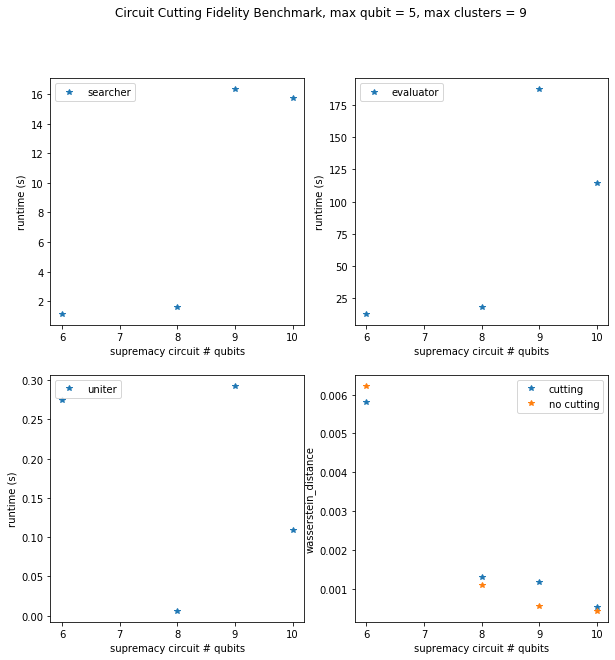

In [10]:
fidelity_benchmark = pickle.load(open('./data/fidelity_benchmark.p', 'rb' ))
num_qubits,times,cutting_distances,no_cutting_distances = fidelity_benchmark

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(num_qubits,times['searcher'],'*',label='searcher')
plt.xlabel('supremacy circuit # qubits')
plt.ylabel('runtime (s)')
plt.legend()
plt.subplot(222)
plt.plot(num_qubits,times['evaluator'],'*',label='evaluator')
plt.xlabel('supremacy circuit # qubits')
plt.ylabel('runtime (s)')
plt.legend()
plt.subplot(223)
plt.plot(num_qubits,times['uniter'],'*',label='uniter')
plt.xlabel('supremacy circuit # qubits')
plt.ylabel('runtime (s)')
plt.legend()
plt.subplot(224)
plt.plot(num_qubits,cutting_distances,'*',label='cutting')
plt.plot(num_qubits,no_cutting_distances,'*',label='no cutting')
plt.xlabel('supremacy circuit # qubits')
plt.ylabel('wasserstein_distance')
plt.legend()
plt.suptitle('Circuit Cutting Fidelity Benchmark, max qubit = 5, max clusters searched= 9')
# plt.savefig('./data/fidelity_benchmark.png')